# Map-matching a track on a network

On peut mapper une trace sur un réseau (mapOnNetwork), un raster sur une trace (mapOnRaster), une trace sur une autre trace (mapOn).

## Import de la librairie tracklib

In [1]:
import matplotlib.pyplot as plt
import os
import sys

#-------------------------------------------------------
# Import de tracklib

module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tracklib as trk

code running in a no qgis environment
Code running in a no qgis environment


## Read GPX data

In [2]:
import matplotlib.pyplot as plt

# On charge les données

trk.ObsTime.setReadFormat("4Y/2M/2D 2h:2m:2s")
trackpath = '/home/marie-dominique/tracklib/tracklib/data/gpx/utgtrack-22245.csv'
netpath = '/home/marie-dominique/tracklib/tracklib/data/network/network-utgtrack-22245.csv'

# ================================================================

trace = trk.TrackReader.readFromCsv(path=trackpath, id_E=0, id_N=1, id_T=6,
                                  srid="GeoCoords", h=1,
                                  separator = ',', verbose = True)
trace.toENUCoordsIfNeeded()
trace.summary()

Loading file /home/marie-dominique/tracklib/tracklib/data/gpx/utgtrack-22245.csv
['2.548994087', '48.639474995', '"0"', '"0"', '"154"', '82', '2019/07/12 15:42:35']
['2.548748916', '48.639460495', '"0"', '"0"', '"155"', '82', '2019/07/12 15:42:38']
['2.548556551', '48.639529645', '"0"', '"0"', '"156"', '82', '2019/07/12 15:42:41']
['2.548444066', '48.639599048', '"0"', '"0"', '"157"', '82', '2019/07/12 15:42:43']
['2.548230076', '48.639655458', '"0"', '"0"', '"158"', '82', '2019/07/12 15:42:46']
['2.548003346', '48.63967658', '"0"', '"0"', '"159"', '82', '2019/07/12 15:42:49']
['2.547859009', '48.63965923', '"0"', '"0"', '"160"', '82', '2019/07/12 15:42:51']
['2.54758995', '48.639661241', '"0"', '"0"', '"161"', '82', '2019/07/12 15:42:55']
['2.547314772', '48.63969611', '"0"', '"0"', '"162"', '82', '2019/07/12 15:42:59']
['2.546572387', '48.639735421', '"0"', '"0"', '"163"', '82', '2019/07/12 15:43:09']
['2.545456085', '48.639859054', '"0"', '"0"', '"164"', '82', '2019/07/12 15:43:23']

## Load the network

In [3]:
network = trk.NetworkReader.readFromFile(netpath, formatfile = 'VTT')
network.toENUCoords(trace.base)
print ('nb edges=', len(network.EDGES))
print ('nb nodes=', len(network.NODES))
print ('total length=', network.totalLength())



100% (289 of 289) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


Loading network...
nb edges= 288
nb nodes= 216
total length= 19386.544826479818


## Prepare and launch the map matching process

In [4]:
si = trk.SpatialIndex(network)
network.spatial_index = si



  0% (0 of 288) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

Building [100 x 80] spatial index...


100% (288 of 288) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [5]:
# computes all distances between pairs of nodes
network.prepare()



 23% (50 of 216) |#####                  | Elapsed Time: 0:00:00 ETA:   0:00:00

Computing all pairs shortest distances...


100% (216 of 216) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


In [6]:
# Map track on network
trk.mapOnNetwork(trace, network, search_radius=25, debug=False)



100% (52 of 52) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (51 of 51) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Map-matching preparation...
Compilation of states on track
Cost and marker matrix initialization
Compilation of observations on track
Optimal sequence computation
Backward reconstruction phase


## Display results 

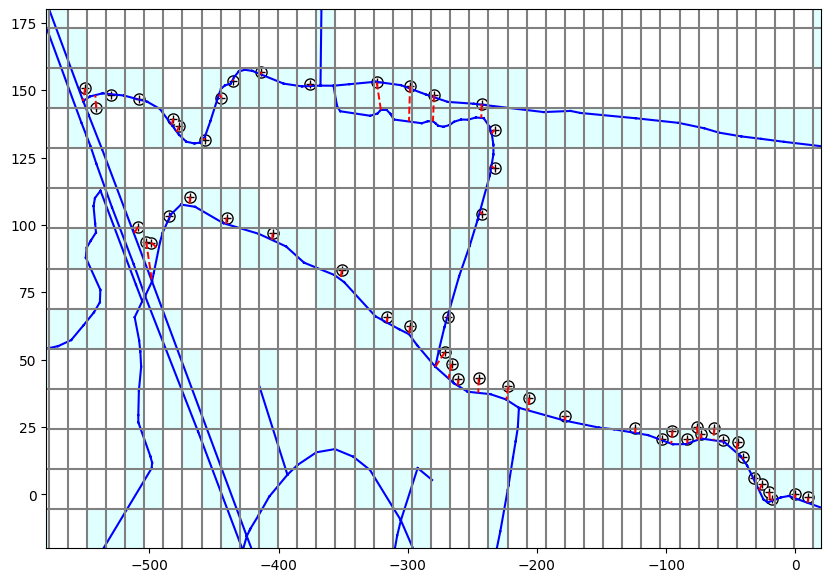

In [7]:
plt.figure(figsize = (10, 7))

# emprise = trace.bbox()
plt.xlim([-580, 20])
plt.ylim([-20, 180])

trace.plotAsMarkers(append=True)
network.plot('b-', '', '', '', 1.5, plt)
si.plot(base=False, append=True)

for k in range(len(trace)):
    X = [trace[k].position.getX(), trace["hmm_inference", k][0].getX()]
    Y = [trace[k].position.getY(), trace["hmm_inference", k][0].getY()]
    plt.plot(X, Y, "r--", linewidth=1.4)
    trace[k].position.setX(trace["hmm_inference", k][0].getX())
    trace[k].position.setY(trace["hmm_inference", k][0].getY())